<h1 style="font-family:'Poppins', Arial, sans-serif; font-weight:700; color:#1e8449; text-align:center; margin-bottom:20px; letter-spacing:1px; font-size:40px;">👨‍💻 Author: <span style="color:#0cd865;">Ali Hassan</span></h1>

<div style="text-align:center; margin-top:20px; line-height:3; font-size:18px;">
  <span style="margin-right:8px;"></span><a href="https://github.com/Ali-Shahzadd"><img src="https://img.shields.io/badge/GitHub-Profile-181717?style=flat-square&logo=github&logoColor=white" alt="GitHub" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.kaggle.com/alihassanshahzad786"><img src="https://img.shields.io/badge/Kaggle-Profile-20BEFF?style=flat-square&logo=kaggle&logoColor=white" alt="Kaggle" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.linkedin.com/in/ali-hassan-3952a2290/"><img src="https://img.shields.io/badge/LinkedIn-Profile-0077B5?style=flat-square&logo=linkedin&logoColor=white" alt="LinkedIn" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://x.com/alishahzadddd?s=21"><img src="https://img.shields.io/badge/Twitter-Profile-1DA1F2?style=flat-square&logo=twitter&logoColor=white" alt="Twitter" style="height:30px;"></a>
</div>



<h1 style="
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    font-size: 2.5rem;
    font-weight: 700;
    color: #34495e;
    margin-top: 20px;
    letter-spacing: 1px;
">
    💰 Loan Status Prediction
</h1>


## About Dataset

### [Dataset here...](https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction)
In this Loan Status Prediction dataset, we have the data of applicants who previously applied for the loan based on the property which is a Property Loan.
The bank will decide whether to give a loan to the applicant based on some factors such as Applicant Income, Loan Amount, previous Credit History, Co-applicant Income, etc…
Our goal is to build a Machine Learning Model to predict the loan to be approved or to be rejected for an applicant.\
### **About the loan_data.csv file:**
* Loan_ID: A unique loan ID.
* Gender: Either male or female.
* Married: Weather Married(yes) or Not Marttied(No).
* Dependents: Number of persons depending on the client.
* Education: Applicant Education(Graduate or Undergraduate).
* Self_Employed: Self-employed (Yes/No).
* ApplicantIncome: Applicant income.
* CoapplicantIncome: Co-applicant income.
* LoanAmount: Loan amount in thousands.
* Loan_Amount_Term: Terms of the loan in months.
* Credit_History: Credit history meets guidelines.
* Property_Area: Applicants are living either Urban, Semi-Urban or Rural.
* Loan_Status: Loan approved (Y/N).\
Goal:\
In this project, we are going to classify an individual whether he/she can get the loan amount based on his/her Income, Education, Working Experience, Loan taken previously, and many more factors.
Let’s get more into it by looking at the data.

In [39]:
# importing Libraries

import pandas as pd
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn import svm

In [26]:
df=pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
# Checking the Null Values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
# converting columns names into lowercase
df.columns = map(str.lower, df.columns)
df.head() 

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [30]:
# using one label encoder on the categorical columns and storing each in a variable for the inverse transform
le=LabelEncoder()
cat_col=['gender', 'married', 'education','self_employed','property_area','dependents', 'loan_status']
for col in cat_col:
    df[col]=le.fit_transform(df[col].astype(str))
    globals()[col]=le
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [31]:
# Dropping the columns which are not required
df.drop(columns=['loan_id'], inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             614 non-null    int32  
 1   married            614 non-null    int32  
 2   dependents         614 non-null    int32  
 3   education          614 non-null    int32  
 4   self_employed      614 non-null    int32  
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    float64
 7   loanamount         592 non-null    float64
 8   loan_amount_term   600 non-null    float64
 9   credit_history     564 non-null    float64
 10  property_area      614 non-null    int32  
 11  loan_status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [33]:
# Imputing Misising Values by using KNN Imputer
knn=KNNImputer(n_neighbors=3)
df.iloc[:,:]=knn.fit_transform(df)
df.isnull().sum()


gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [38]:
# splitting the data into dependent and independent features
x=df.drop(columns=['loan_status'])
y=df['loan_status']
print(x.shape)
print(y.shape)

(614, 11)
(614,)


In [35]:
# trainign and splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<Axes: xlabel='education', ylabel='count'>

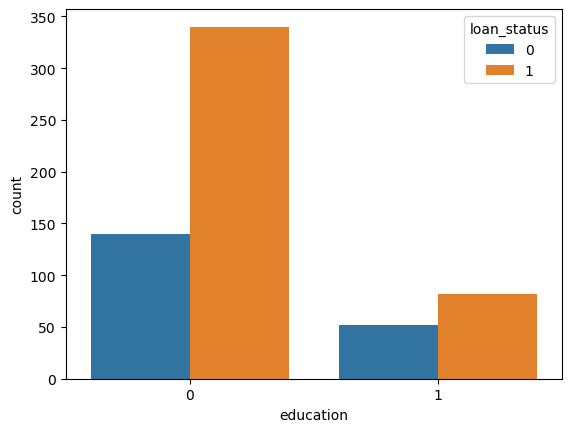

In [36]:
# Data visualization
sns.countplot(x='education', hue='loan_status', data=df)

<Axes: xlabel='married', ylabel='count'>

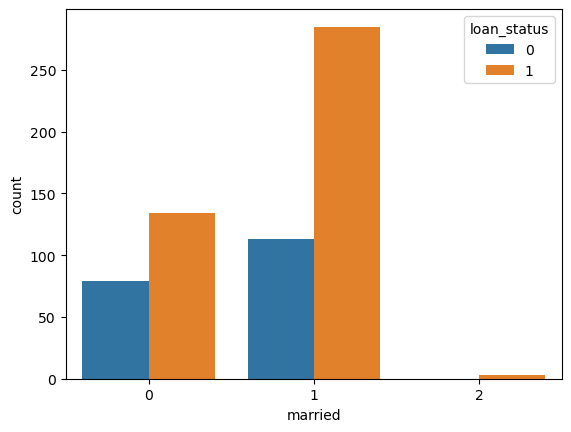

In [ ]:
# martial status and loan status
sns.countplot(x='married', hue='loan_status', data=df)

In [40]:
# Now training the model
classifier=svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)


SVC(kernel='linear')

In [41]:
x_train_prediction=classifier.predict(x_train)
training_data_accuracy=sklearn.metrics.accuracy_score(y_train, x_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8024439918533605


In [42]:
# Making a predicting on test data
x_test_prediction=classifier.predict(x_test)
test_data_accuracy=sklearn.metrics.accuracy_score(y_test, x_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7967479674796748
